## Task 1: The Collatz conjecture
***
The Collatz Conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2...

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

def f(x):
    # If x is even, divide it by two
    if x % 2 == 0:
        return x // 2
    # If x is odd, multiply by 3 and add 1
    else:
        return 3 * x + 1

In [2]:
def collatz(x):
    sequence = []
    while x != 1:
        sequence.append(x)
        x = f(x)
    sequence.append(1)  # Add 1 as the end of the sequence
    return sequence

In [3]:
def collatz_test(limit):
    for i in range(1, limit + 1):
        sequence = collatz(i)
        if 1 not in sequence:
            return False, i  # Shows if it fails and the failing number
    return True, None

In [4]:
# Check our test for the first 10,000 numbers
result, failing_number = collatz_test(10000)

if result:
    print("Yes, the Collatz conjecture holds true for the first 10,000 positive integers. This means that if you start with any one of the first 10,000 positive integers and apply the Collatz transformation repeatedly, you will eventually reach the number 1.")
else:
    print(f"The Collatz Conjecture fails at integer: {failing_number}.")

Yes, the Collatz conjecture holds true for the first 10,000 positive integers. This means that if you start with any one of the first 10,000 positive integers and apply the Collatz transformation repeatedly, you will eventually reach the number 1.


***

## End

## Task 2: Penguins Dataset

### Overview
The Penguins Dataset is a well known  and valuable resource within the data analysis and machine learning communities. It comprises a collection of data on penguin measurements from the Palmer Archipelago in Antarctica. This dataset is integral for a variety of research and educational purposes, ranging from ecological studies to introductory data science courses.

### Selection of Variables in the Dataset

#### Categorical Variables
Representing nominal scale variables, these include:
- Species: Data on three species (Chinstrap, Adélie, and Gentoo), each with distinct physical characteristics.
- Island: Information from three islands (Dream, Torgersen, and Biscoe) in the Palmer Archipelago.
- Sex: Differentiating between male and female penguins, with notable size differences.

In Python, these are optimally represented as `category` data types for efficient memory usage and performance (in compaison `object` would instead be typically used for strings). As such when modelling the categorical variables in the Penguin Dataset we are going to convert and use `category` data types. This helps provide semantic meaning to the data and imporves operations such as grouping and sorting. 

#### Numerical Variables
Comprising interval or ratio scale variables, these include:
- Bill Length and Depth: Measuring the culmen length (from the tip of the beak to the base of the nasal bone) and depth.
- Flipper Length: Distance from the flipper tip to the body joint.
- Body Mass: The weight of penguins in grams.

In Python, these variables are best represented as `float64` or `int64` data types, depending on the precision required. `float64`would be more representative in the Penguins Dataset as this would be the standard for floating-point numbers in Python. Futhermore this allows a a good balance between memory usage and precision in mathematical computations.  

### Applications and Significance
The dataset is extensively used to:
- Investigate relationships between species and physical traits.
- Analyse distribution across islands.
- Study gender-based physical differences.
- Develop predictive models for body mass.
- Track population trends.

### References
The dataset is attributed to Allison M. Horst, A. P. Hill, and K. B. Gorman (2020) in their compilation 'palmerpenguins: Palmer Archipelago (Antarctica) penguin data' (R package version 0.1.0). Further, Gorman, Williams, & Fraser’s 2014 study in PLoS ONE provides foundational data for this dataset.

In [5]:
# Importing libaries
import pandas as pd

# Importing the Penguins Dataset using CSV provided on ATU Moodle
url = "https://github.com/nf-me/fundamentals_dataanalysis/blob/master/data/penguins.csv?raw=true"
penguins_df = pd.read_csv(url)

# Displaying the initial data types
print("\nInitial Data Types:")
print(penguins_df.dtypes)

# Converting categorical variables to 'category' type
convert_category = ['species', 'island', 'sex']
for column in convert_category:
    penguins_df[column] = penguins_df[column].astype('category')

# Verifying the changes in data types
print("\nData Types after Conversion:")
print(penguins_df.dtypes)


Initial Data Types:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Data Types after Conversion:
species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


***

## End

## Task 3: Probability distributions (Penguin Dataset)
***
For each of the variables in the Penguin Dataset, suggest what probability distribution from the NumPy random distributions list is the most appropiate. Four of the most common distribution from NumPy (NumPy Documentation, 2022) that we will be comparing are:

- Normal: A bell-shaped distribution commonly used to model continuous, symmetric data, like heights and test scores.
- Log-normal: A skewed distribution often used to model data with a long right tail, like income and company sizes.
- Exponential: A one-parameter distribution used to model time intervals between events, like customer arrivals or light bulb lifespans. 
- Gamma: A two-parameter distribution used to model waiting times or count data with a long upper tail, like number of insurance claims or website visits

To test which is most appropiate we will have to structure the analysis by:
- Generating test data.
- Plotting real data (Penguin Dataset vs test data).
- Analyse the difference between different distributions.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Penguins Dataset using CSV provided on ATU Moodle
url = "https://github.com/nf-me/fundamentals_dataanalysis/blob/master/data/penguins.csv?raw=true"
penguins_df = pd.read_csv(url)

In [7]:
# Creating Test Data
def test_data(distribution, real_data, size=1000):
    if distribution == 'normal':
        return np.random.normal(np.mean(real_data), np.std(real_data), size)
    elif distribution == 'lognormal':
        return np.random.lognormal(np.mean(np.log(real_data)), np.std(np.log(real_data)), size)
    elif distribution == 'exponential':
        return np.random.exponential(np.mean(real_data), size)
    elif distribution == 'gamma':
        return np.random.gamma(np.mean(real_data), np.std(real_data), size)

# Plotting the data
def plot_comparisons(variable_name, real_data):
    plt.figure(figsize=(12, 8))
    distributions = ['normal', 'lognormal', 'exponential', 'gamma']
    
    for i, dist in enumerate(distributions, 1):
        plt.subplot(2, 2, i)
        sns.histplot(real_data, bins=30, kde=True, color='black', label='Real Data', stat='density')
        synthetic_data = test_data(dist, real_data)
        sns.kdeplot(synthetic_data, color='salmon', label=f'{dist.capitalize()} Test Data')
        plt.title(f'{variable_name} - {dist.capitalize()} Distribution')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for each variable in the dataset
variables = {
    'bill_length_mm': penguins_df['bill_length_mm'].dropna(),
    'bill_depth_mm': penguins_df['bill_depth_mm'].dropna(),
    'flipper_length_mm': penguins_df['flipper_length_mm'].dropna(),
    'body_mass_g': penguins_df['body_mass_g'].dropna()
}

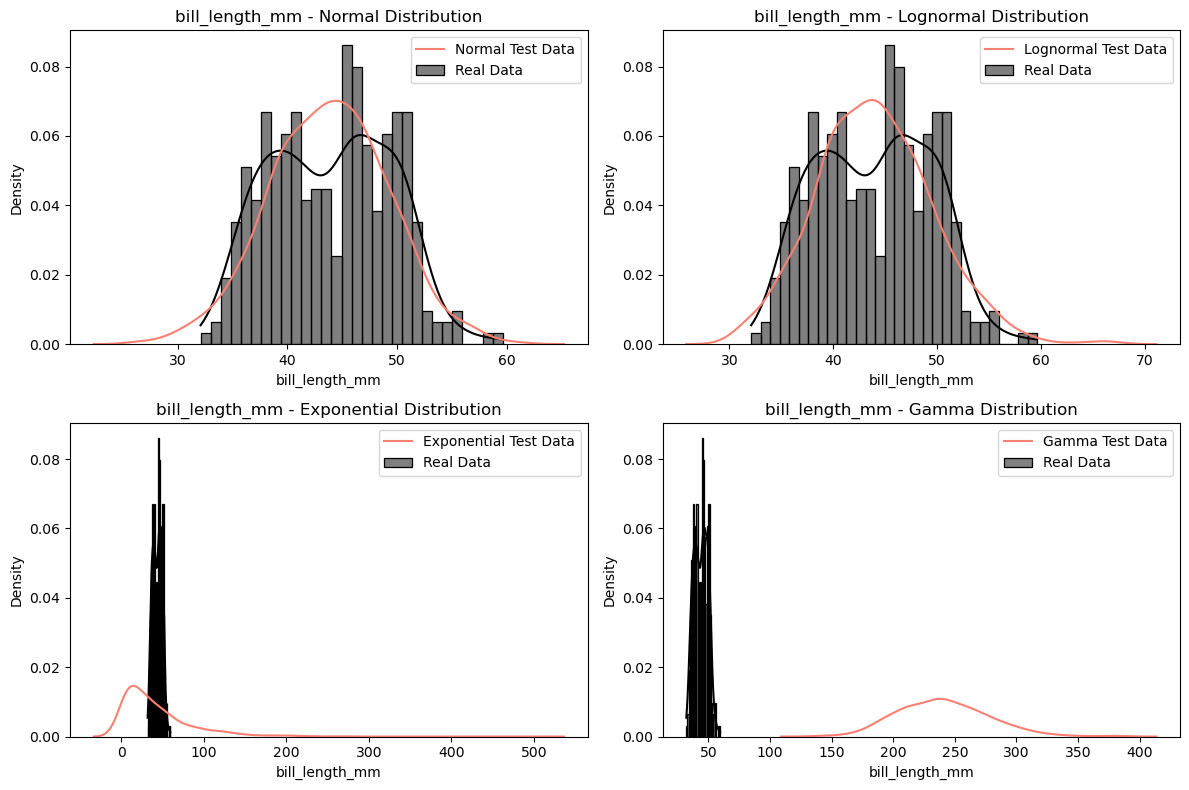

In [8]:
# Bill Length Comparison
plot_comparisons('bill_length_mm', penguins_df['bill_length_mm'].dropna())

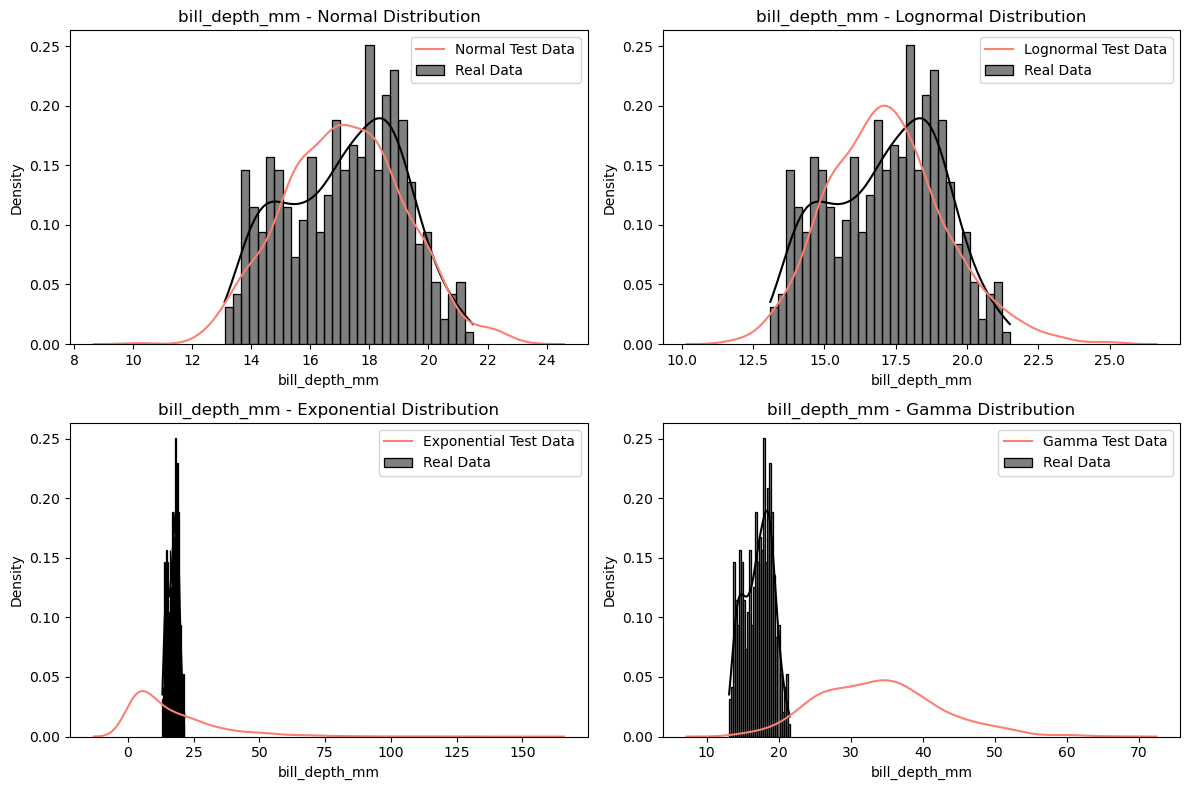

In [9]:
# Bill Depth Comparison
plot_comparisons('bill_depth_mm', penguins_df['bill_depth_mm'].dropna())

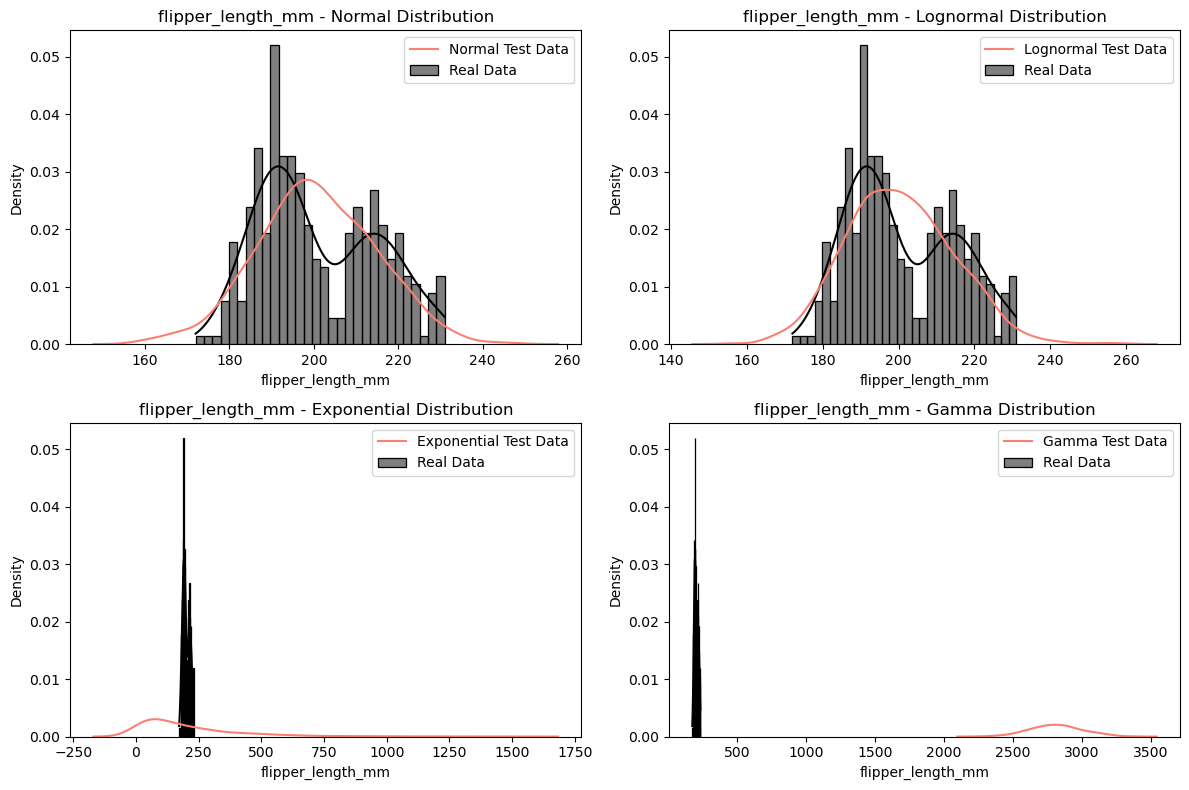

In [10]:
# Flipper Length Comparison
plot_comparisons('flipper_length_mm', penguins_df['flipper_length_mm'].dropna())

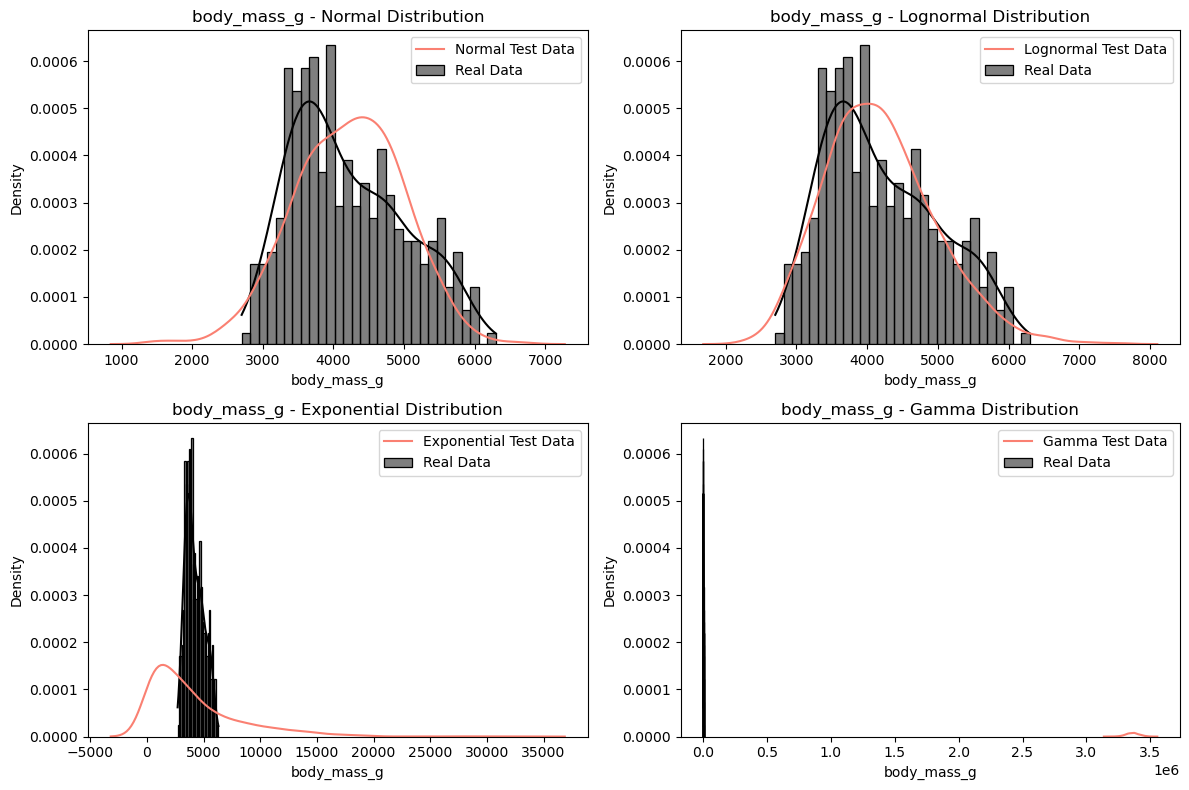

In [11]:
# Body Mass Comparison
plot_comparisons('body_mass_g', penguins_df['body_mass_g'].dropna())

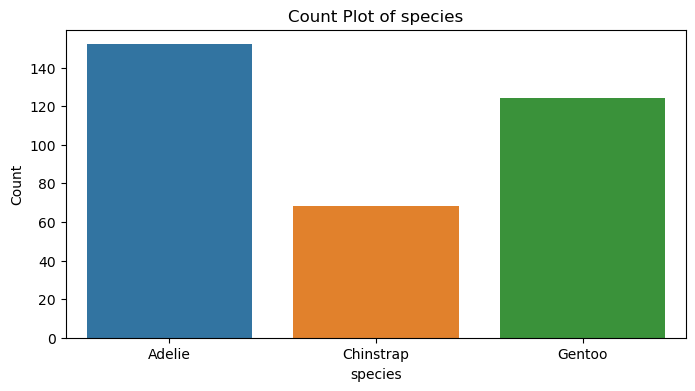

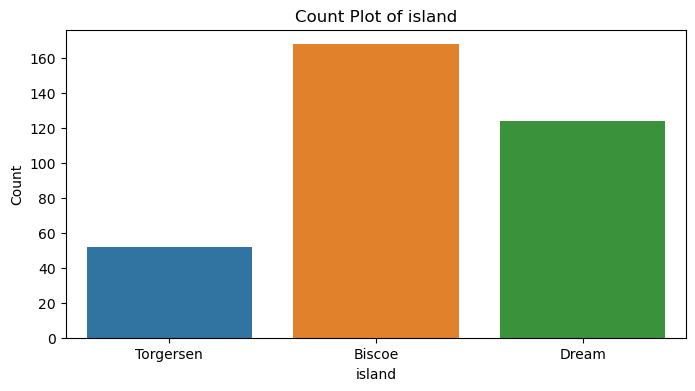

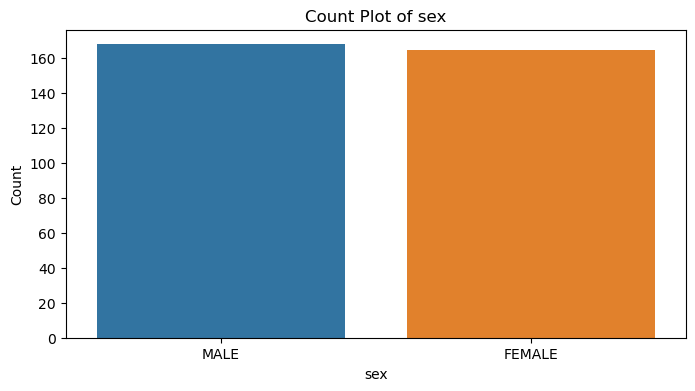

In [12]:
# Categorical Variables - realised I never added these whilst doing Task 5

for col in ['species', 'island', 'sex']:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=penguins_df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


## Results 
#### _What probability distribution from numpy random is most appropiate_
Based on the above plots it is reasonable to suggest that the Penguins Dataset exhibts normal distribution for a number of the variables. From a visual perspective I would attribute the below  distributions when suggesting a probability distribution from the NumPy random distributions:

    - Bill Length: Normal Distribution
    - Bill Depth: Normal Distribution
    - Flipper Length: Lognormal Distribution
    - Body Mass: Lognormal Distribution

For the categorical variables in the Penguins dataset, such as 'species', 'island', and 'sex', the most appropriate way to represent their distributions is through count plots, as these variables are discrete and represent distinct categories.

To note, visual inspection is subjective and should be supplemented with statistical tests or goodness-of-fit measures for a more objective analysis.

***

## End

## Task 4: Flipping Two Coins Probability
***
Suppose you are flipping two coins, each with a proability p of giving heads. Plot the entropy of the total number of heads versus p

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# This calculates the entropy of a single coin flip with p of getting heads.
def H(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

In [15]:
# Probability Range
# Create array of prbabilities from 0 to 1 (divided into 1000 points).
# This will evaluate entropy at different probabilities of getting heads

p_range = np.linspace(0, 1, 1000)

In [16]:
# This calculates the entropy for two coin flips
# We have 3 scenarios 
# safe_log2 added as due to error; mathematically not possible to take logarithim of zero

def safe_log2(x):
    if x == 0:
        return 0
    else:
        return np.log2(x)

def H2(p):
    heads_0 = (1 - p)**2 # not getting heads
    heads_1 = 2 * p * (1 - p) # getting one coin to land on heads
    heads_2 = p**2 # getting one coin to land on heads
    
    
    entropy = -(heads_0 * safe_log2(heads_0) + heads_1 * safe_log2(heads_1) + heads_2 * safe_log2(heads_2))
    return entropy

In [17]:
# calculates entropy for each probability in p_range from above by using the two coin 'H2' function

entropies = [H2(p) for p in p_range]

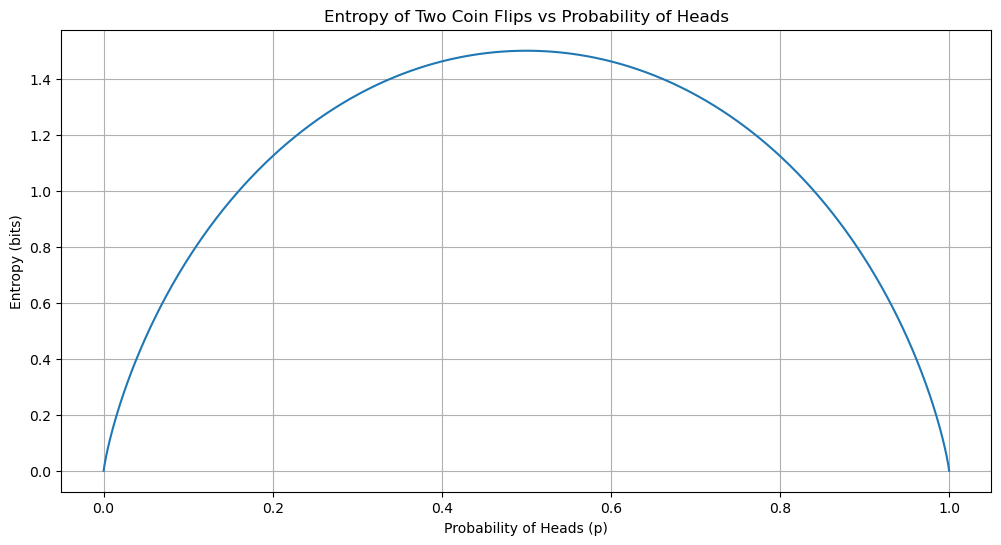

In [18]:
# Create aplot.
plt.figure(figsize=(12,6))
plt.plot(p_range, entropies, label="Entropy of 2 Coin Flips")
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy (bits)')
plt.title('Entropy of Two Coin Flips vs Probability of Heads')
plt.grid(True)
plt.show()

### Consuclusion
- The peak entropy occurs at a head probability of 0.5. This reflects the highest level of unpredictability in the outcomes of the coin flips. At this point, the chance of getting heads or tails is equally likely, leading to the greatest uncertainty.


- As the probability of getting heads moves away from 0.5, either towards 0 or 1, the entropy decreases. This suggests a reduction in uncertainty. When the probability is near 0 or 1, the outcome becomes more predictable.


- A perfectly balanced coin (with a 0.5 probability of heads) results in the most unpredictable series of outcomes. In contrast, a biased coin (where the probability of heads is significantly different from 0.5) leads to more predictable outcomes.

***

## End

## Task 5: Penguin Dataset - Appropiate Plots 
***
Create an appropiate individual plot for each of the variables in the penguin dataset.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Importing the Penguins Dataset using CSV provided on ATU Moodle
url = "https://github.com/nf-me/fundamentals_dataanalysis/blob/master/data/penguins.csv?raw=true"
penguins_df = pd.read_csv(url)

# Making the plots pretty
sns.set_theme(style="whitegrid")

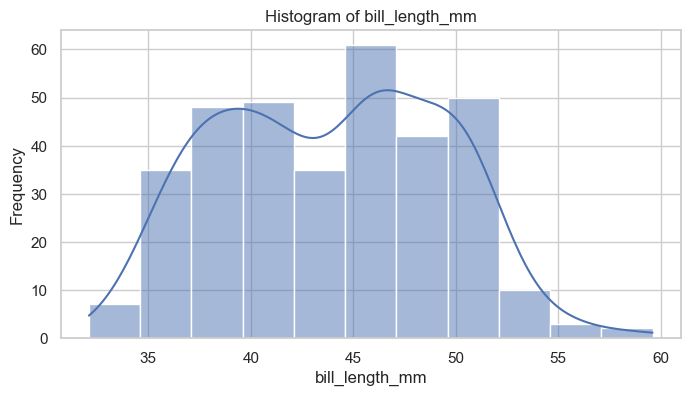

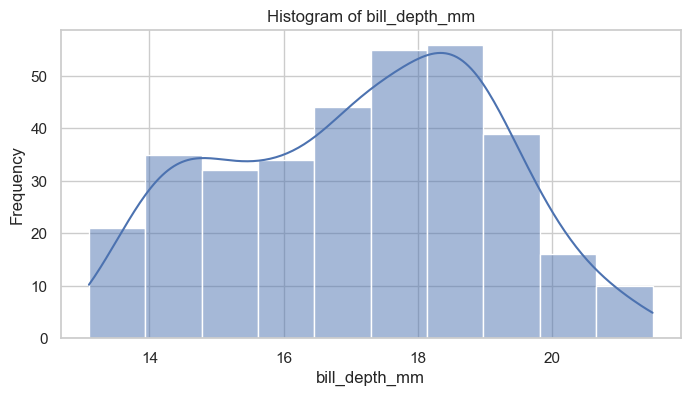

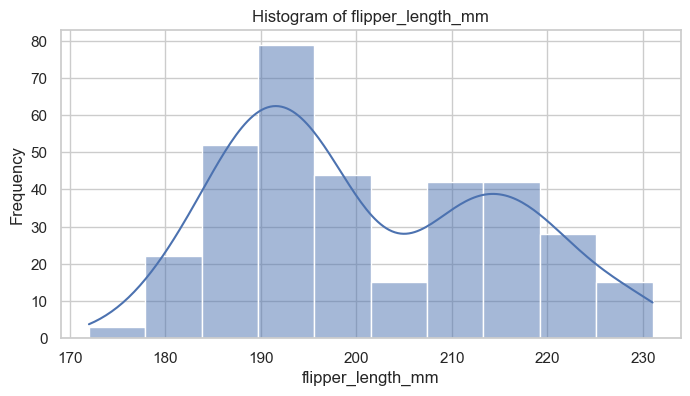

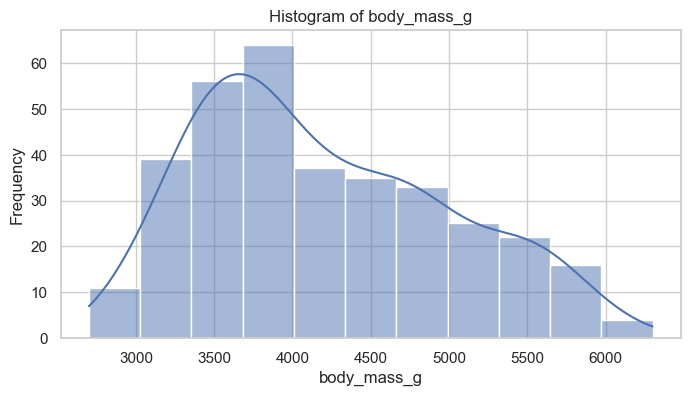

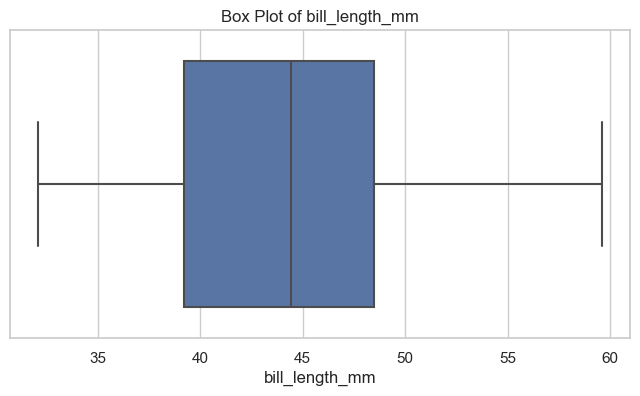

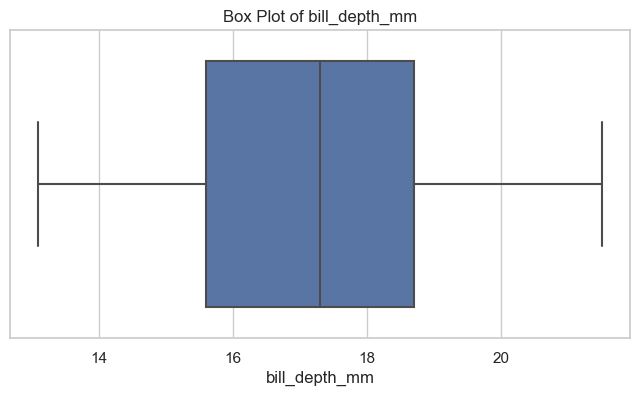

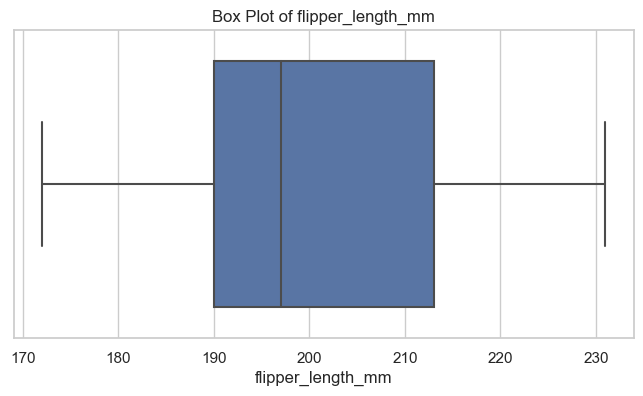

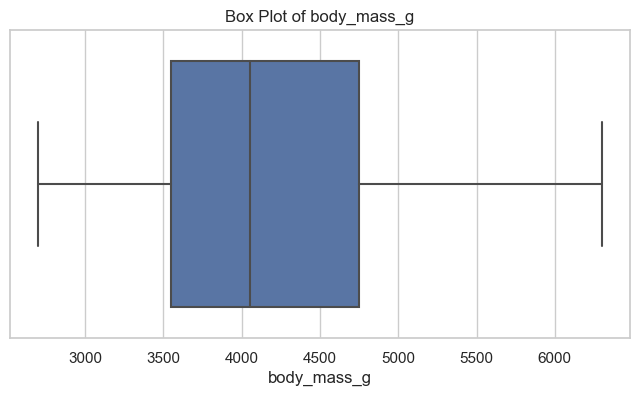

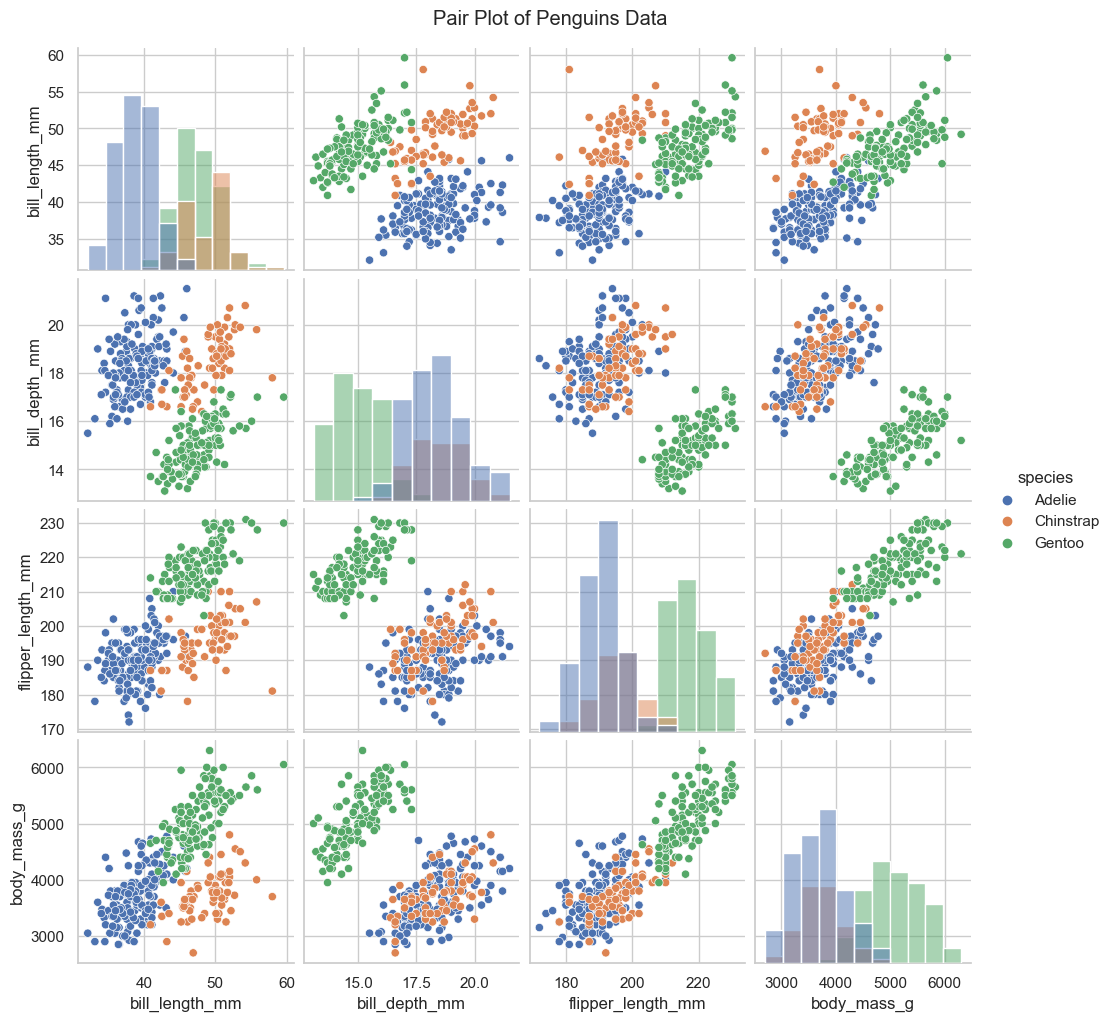

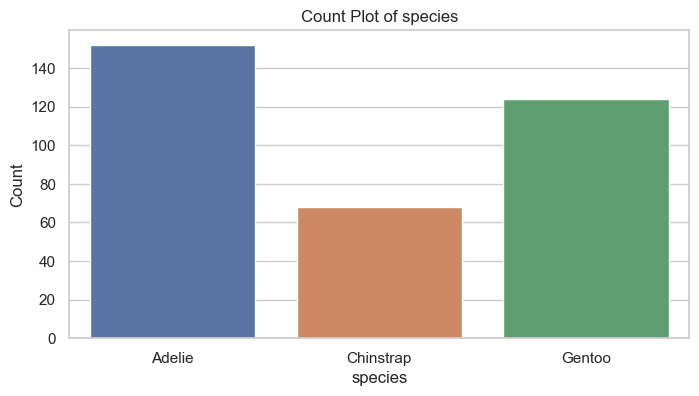

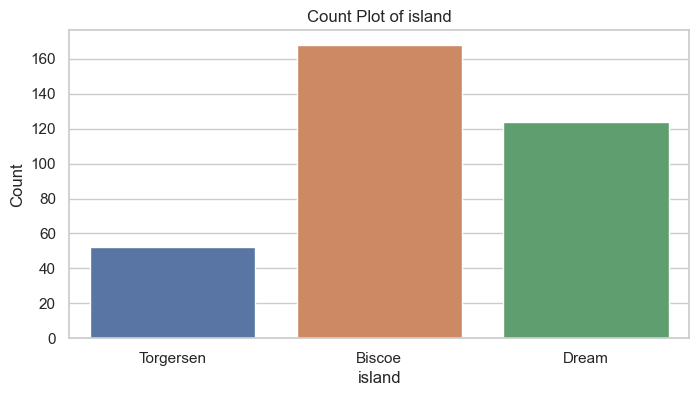

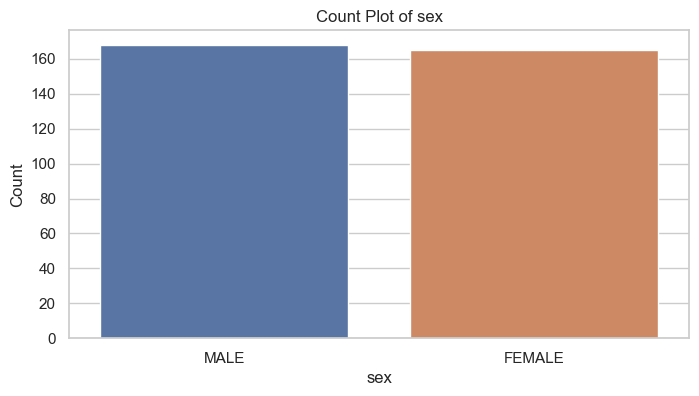

In [20]:
# Histograms for Numerical Variables
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    plt.figure(figsize=(8, 4))
    sns.histplot(penguins_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box Plots for Numerical Variables
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, data=penguins_df)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Scatter Plot Matrix
sns.pairplot(penguins_df, hue="species", diag_kind='hist')
plt.suptitle('Pair Plot of Penguins Data', y=1.02)
plt.show()

# Bar Plots for Categorical Variables
for col in ['species', 'island', 'sex']:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=penguins_df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [21]:
# Descriptive stats to help with results
def descriptive_stats(data):
    stats = {
        'mean': np.mean(data),
        'std': np.std(data, ddof=1),
        'min': np.min(data),
        '25%': np.percentile(data, 25),
        '50%': np.percentile(data, 50),  # median
        '75%': np.percentile(data, 75),
        'max': np.max(data),
        'skew': skew(data),
        'kurtosis': kurtosis(data)
    }
    return stats

# Compute statistics for each numerical variable
stats_bill_length = descriptive_stats(penguins_df['bill_length_mm'].dropna())
stats_bill_depth = descriptive_stats(penguins_df['bill_depth_mm'].dropna())
stats_flipper_length = descriptive_stats(penguins_df['flipper_length_mm'].dropna())
stats_body_mass = descriptive_stats(penguins_df['body_mass_g'].dropna())

# Create a DataFrame to display the statistics
stats_df = pd.DataFrame({
    'Bill Length (mm)': stats_bill_length,
    'Bill Depth (mm)': stats_bill_depth,
    'Flipper Length (mm)': stats_flipper_length,
    'Body Mass (g)': stats_body_mass
})

stats_df

,Bill Length (mm),Bill Depth (mm),Flipper Length (mm),Body Mass (g)
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000
skew,0.052885,-0.142835,0.344164,0.468264
kurtosis,-0.880765,-0.911155,-0.987434,-0.726243


## Results
The analysis of the Penguins dataset reveals distinct characteristics across various measurements.

Bill Length and Bill Depth display nearly symmetric distributions with moderate variability, while Flipper Length and Body Mass exhibit slightly right-skewed distributions, indicating longer tails towards higher values. All variables have distributions that are flatter than a normal distribution, suggesting diverse traits within the penguin population.

The observed variability and skewness in measurements like Body Mass and Flipper Length could be influenced by species differences or environmental factors, underscoring the need for species-specific analysis if this was to be explored further.

***

## End